In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator


In [121]:
folder_path = '/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/oasis_cross-sectional'
paths =sorted(os.listdir(folder_path))
for i in paths:
    if i.startswith('.'):
        paths.remove(i)
print(paths[0:10])

['OAS1_0001_MR1', 'OAS1_0002_MR1', 'OAS1_0003_MR1', 'OAS1_0004_MR1', 'OAS1_0005_MR1', 'OAS1_0006_MR1', 'OAS1_0007_MR1', 'OAS1_0009_MR1', 'OAS1_0010_MR1', 'OAS1_0011_MR1']


In [51]:
# Deleting all .img and .hdr files and t4_files folders in dataset, to decrease size. 
# We will use gif files only.

'''
for path in paths:
    directory2 = folder_path + '/' + path + '/'
    #os.rmdir(directory2+'PROCESSED/MPRAGE/T88_111/t4_files')
    shutil.rmtree(directory2+'PROCESSED/MPRAGE/T88_111/t4_files', ignore_errors=True)

    folders = ['FSL_SEG/',
            'RAW/',
            'PROCESSED/MPRAGE/SUBJ_111/',
            'PROCESSED/MPRAGE/T88_111/'
            ]
    paths2 = sorted(os.listdir(directory2))
    for i in paths2:
        if i.startswith('.'):
            paths2.remove(i)
            
    for folder in folders:
        paths3 = sorted(os.listdir(directory2+folder))
        img_list = [s for s in paths3 if 'img' in s]
        for img in img_list:
            os.remove(directory2+folder+img)
        hdr_list = [s for s in paths3 if 'hdr' in s]
        for hdr in hdr_list:
            os.remove(directory2+folder+hdr)
'''

In [ ]:
# Copy all masked gif photos to one folder

'''
destination_directory = './oasis-masked-gif'
for path in paths:
    directory = f'./oasis1/oasis1.nosync/oasis_cross-sectional/{path}/PROCESSED/MPRAGE/T88_111/'
    # find masked gif file
    deneme = sorted(os.listdir(directory))
    gif_list = [s for s in deneme if 'gif' in s]
    masked_list = [s for s in deneme if 'masked' in s]
    # take intersection
    my_file = list(set(gif_list) & set(masked_list))
    file_to_copy = directory + str(my_file[0])
    
    shutil.copy(file_to_copy, destination_directory)
'''

In [122]:
df=pd.read_csv('/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics//oasis_cross-sectional.csv')
df=df.drop(['Hand',  'Delay'], axis=1)

# fill NaN Values in columns Educ, SES, MMSE, with mean values of patients with CDR = 0.
# with one decimal point

df['Educ'].fillna(df[df['CDR'] == 0.0]['Educ'].mean().__round__(1), inplace = True)
df['SES'].fillna(df[df['CDR'] == 0.0]['SES'].mean().__round__(1), inplace = True)
df['MMSE'].fillna(df[df['CDR'] == 0.0]['MMSE'].mean().__round__(1), inplace = True)

# fill NaN values with 0 in CDR column
df['CDR'].fillna(0, inplace=True)
#df['CDR'] = df['CDR'].astype(str)

# fill other NaN values with mean of their columns
#df.fillna(df[['Educ', 'SES', 'MMSE']].mean(), inplace=True)
df.to_csv('oasis_cross-sectional_clean.csv', index=False)

df.head()

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0004_MR1,M,28,3.4,2.3,29.1,0.0,1588,0.803,1.105
4,OAS1_0005_MR1,M,18,3.4,2.3,29.1,0.0,1737,0.848,1.010


### **Additional data**
Demographic, clinical, and derived anatomic measures are located in the spreadsheets files (oasis_cross-
sectional.xls and oasis_cross-sectional.csv) included on the DVD distribution and on the OASIS website. 
### **Demographics**
Gender (M/F),  
Handedness (Hand),   
Age,  
Education (Educ),    
socioeconomic status (SES)  
(Rubin et al., 1998).   
    
Education codes correspond to the following levels of education:   
1: less than high school grad.,   
2: high school grad.,   
3: some college,   
4: college grad.,   
5: beyond college.    
### **Clinical** 
Mini-Mental State Examination (MMSE) (Rubin et al., 1998),   
Clinical Dementia Rating 
(CDR;    
0.0 = nondemented;   
0.5 = very mild dementia;    
1.0 = mild dementia;    
2.0 = moderate dementia) (Morris, 1993).    
All  participants with dementia (CDR >0) were diagnosed with probable AD.  
### **Derived anatomic volumes** 
Estimated total intracranial volume (eTIV) (mm3) (Buckner et al., 2004),   
Atlas scaling factor (ASF) (Buckner et al., 2004),    
Normalized whole brain volume (nWBV) (Fotenos et al., 2004).   

[0.0, 0.5, 1.0, 2.0] 

There are 336 images belong to 0.0 label
There are 70 images belong to 0.5 label
There are 28 images belong to 1.0 label
There are 2 images belong to 2.0 label

 [336, 70, 28, 2]


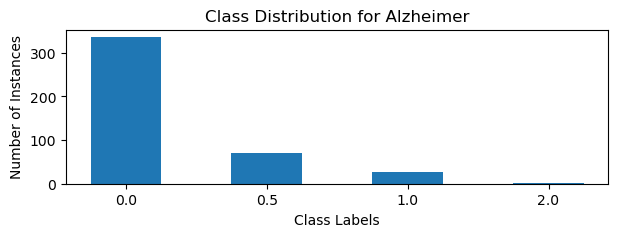

In [123]:
df_alz = df['CDR'].sort_values()
labels = df['CDR'].unique() # 7 labels
labels = list(labels)
labels.sort()
print(labels,'\n')
# how many images are there for each labels
image_counts = []
df_image = df['CDR'].sort_values()
for label in labels:
    image_counts += [len(df[df['CDR'] == label])]
    print("There are " + str(len(df[df['CDR'] == label])) + " images belong to " + str(label) + " label")
print('\n',image_counts)

df_alz = df['CDR'].sort_values()
# convert CDR to string
df_alz = df_alz.astype(str)
size = len(df['CDR'].unique())
#plotting class distribution for lesion_id and image_id
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 2)
bins = np.linspace(0 - .25, size-1 + .25, 2*size)
ax.hist(df_alz.values,bins=bins)
ax.set_title("Class Distribution for Alzheimer")
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Instances')
#plt.savefig('class_distribution.png', dpi=300)
plt.show()

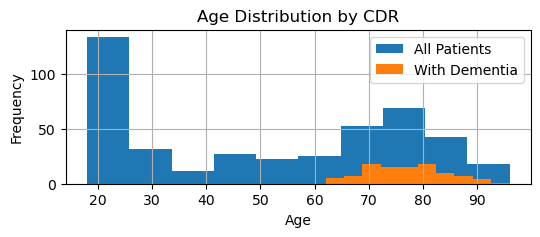

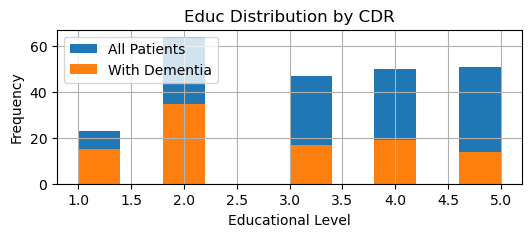

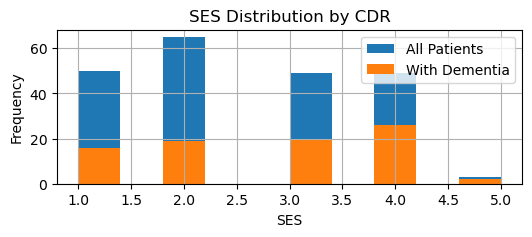

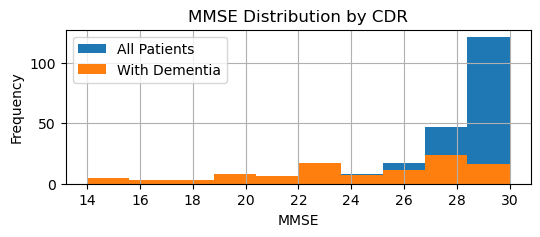

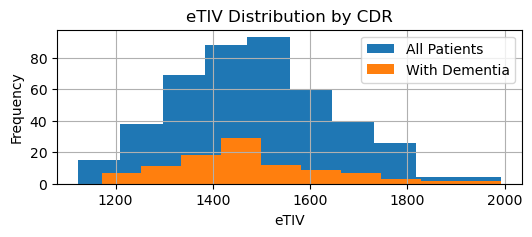

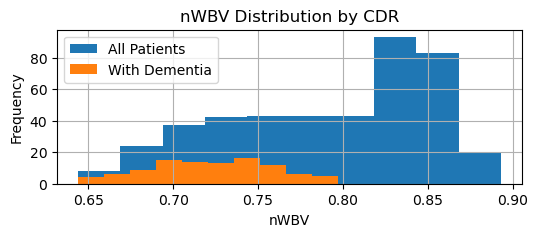

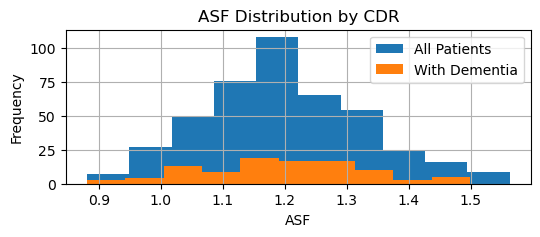

In [124]:
df2=pd.read_csv('/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics//oasis_cross-sectional.csv')

# create a histogram of the 'Age' column for all patients
plt.figure(figsize=(6, 2))
df2['Age'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['Age'].hist(label='With Dementia')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by CDR')
plt.legend()
plt.show()

# create a histogram of the 'Educ' column for all patients
plt.figure(figsize=(6, 2))
df2['Educ'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['Educ'].hist(label='With Dementia')
plt.xlabel('Educational Level')
plt.ylabel('Frequency')
plt.title('Educ Distribution by CDR')
plt.legend()
plt.show()

# create a histogram of the 'SES' column for all patients
plt.figure(figsize=(6, 2))
df2['SES'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['SES'].hist(label='With Dementia')
plt.xlabel('SES')
plt.ylabel('Frequency')
plt.title('SES Distribution by CDR')
plt.legend()
plt.show()

# create a histogram of the 'MMSE' column for all patients
plt.figure(figsize=(6, 2))
df2['MMSE'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['MMSE'].hist(label='With Dementia')
plt.xlabel('MMSE')
plt.ylabel('Frequency')
plt.title('MMSE Distribution by CDR')
plt.legend()
plt.show()

# create a histogram of the 'eTIV' column for all patients
plt.figure(figsize=(6, 2))
df2['eTIV'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['eTIV'].hist(label='With Dementia')
plt.xlabel('eTIV')
plt.ylabel('Frequency')
plt.title('eTIV Distribution by CDR')
plt.legend()
plt.show()

# create a histogram of the 'nWBV' column for all patients
plt.figure(figsize=(6, 2))
df2['nWBV'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['nWBV'].hist(label='With Dementia')
plt.xlabel('nWBV')
plt.ylabel('Frequency')
plt.title('nWBV Distribution by CDR')
plt.legend()
plt.show()

# create a histogram of the 'ASF' column for all patients
plt.figure(figsize=(6, 2))
df2['ASF'].hist(label='All Patients')
df2[df2['CDR'] >= 0.5]['ASF'].hist(label='With Dementia')
plt.xlabel('ASF')
plt.ylabel('Frequency')
plt.title('ASF Distribution by CDR')
plt.legend()
plt.show()